## 1. Loading libraries

In [408]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2. Loading the Data 

In [409]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
dataset = pd.concat([train_dataset, test_dataset], ignore_index=True)

## 3. Data Analysis + Preprocessing

In [410]:
print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [411]:
print(dataset.describe())

       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200  


In [412]:
# # pair plot of the dataset
# sns.pairplot(dataset, hue='Survived')

In [413]:
# print(train_df['Cabin'].unique())


In [414]:
print(dataset['Embarked'].unique())

['S' 'C' 'Q' nan]


In [415]:
print(dataset['SibSp'].unique())

[1 0 3 4 2 5 8]


In [416]:
print(dataset['Parch'].unique())

[0 1 2 5 3 4 6 9]


In [417]:
# null values for age, cabin and embarked
print(dataset.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [418]:
# print the ticket with the most counts
print(dataset['Ticket'].value_counts())

Ticket
CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: count, Length: 929, dtype: int64


In [419]:
# print all the data of the ticket with the most counts
print(dataset[dataset['Ticket'] == 'CA. 2343'])

      PassengerId  Survived  Pclass                               Name  \
159           160       0.0       3         Sage, Master. Thomas Henry   
180           181       0.0       3       Sage, Miss. Constance Gladys   
201           202       0.0       3                Sage, Mr. Frederick   
324           325       0.0       3           Sage, Mr. George John Jr   
792           793       0.0       3            Sage, Miss. Stella Anna   
846           847       0.0       3           Sage, Mr. Douglas Bullen   
863           864       0.0       3  Sage, Miss. Dorothy Edith "Dolly"   
1079         1080       NaN       3                    Sage, Miss. Ada   
1233         1234       NaN       3              Sage, Mr. John George   
1251         1252       NaN       3        Sage, Master. William Henry   
1256         1257       NaN       3     Sage, Mrs. John (Annie Bullen)   

         Sex   Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159     male   NaN      8      2  CA. 2343  

In [420]:
# print the most Siblings/Spouses aboard
print(dataset['SibSp'].value_counts())

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


In [421]:
# print the most Parents/Children aboard
print(dataset['Parch'].value_counts())

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64


In [422]:
# we probably don't need the Id, Cabin, Name column
dataset= dataset.drop(columns=['Cabin','Ticket', 'PassengerId', 'Name', 'Embarked'], axis=1)

<Axes: >

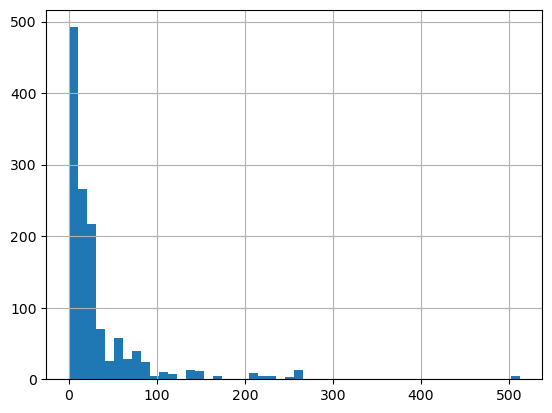

In [423]:
# histogram fare
dataset['Fare'].hist(bins=50)


In [424]:
fare=dataset['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
dataset['Fare']=fare

<Axes: >

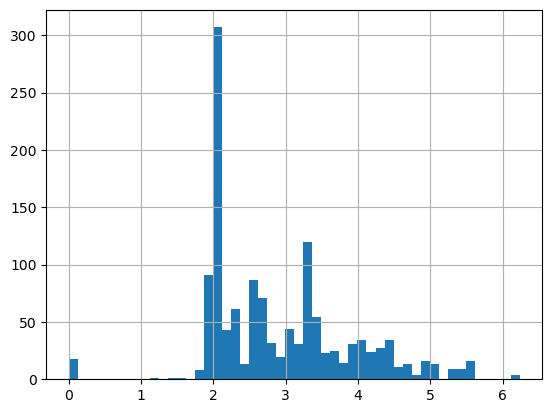

In [425]:
# histogram fare
dataset['Fare'].hist(bins=50)

In [426]:
print(dataset.isnull().sum())

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
dtype: int64


In [427]:
## first we take care of the fare missing value : its in the Pclass 3
dataset.query('Fare.isnull()')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


In [428]:
# we put a median value for a Pclass 3
fare_median = dataset.query('Pclass == 3')['Fare'].median()
dataset['Fare'] = dataset['Fare'].fillna(fare_median)

In [429]:
print(dataset.isnull().sum())

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
dtype: int64


In [430]:
# # we take care of the missing values in the Embarked column
# dataset.query('Embarked.isnull()')

In [431]:
# # # pair plot embarked vs fare vs pclass
# sns.pairplot(dataset[['Embarked', 'Fare', 'Pclass']], hue='Embarked')
# plt.show()

In [432]:
# # # it looks random so we can assign random 
# random_embarked = np.random.choice(['S', 'C', 'Q'])
# dataset['Embarked'] = dataset['Embarked'].fillna(random_embarked)


In [433]:
print(dataset.isnull().sum())

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
dtype: int64


In [434]:
# for each Pclass count how many age nan are
dataset.query('Age.isnull()').groupby('Pclass').size()
print(dataset.query('Age.isnull()').groupby('Pclass').size())

Pclass
1     39
2     16
3    208
dtype: int64


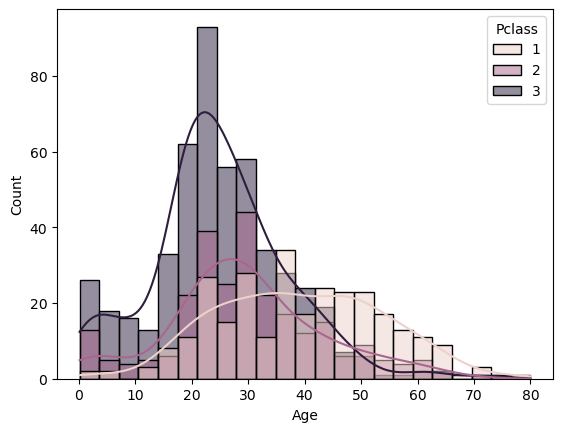

In [435]:
# we need to play with the age column because we have a lot of missing values
# histogram of age for each Pclass

sns.histplot(data=dataset, x='Age', hue='Pclass', kde=True)
plt.show()

In [436]:
# as we can see there are different age distribution for each Pclass
# we can fill the missing values with the median of the Pclass

age_median_pclass1 = dataset.query('Pclass == 1')['Age'].median()
age_median_pclass2 = dataset.query('Pclass == 2')['Age'].median()
age_median_pclass3 = dataset.query('Pclass == 3')['Age'].median()

dataset.loc[dataset['Pclass'] == 1, 'Age'] = dataset.loc[dataset['Pclass'] == 1, 'Age'].fillna(age_median_pclass1)
dataset.loc[dataset['Pclass'] == 2, 'Age'] = dataset.loc[dataset['Pclass'] == 2, 'Age'].fillna(age_median_pclass2)
dataset.loc[dataset['Pclass'] == 3, 'Age'] = dataset.loc[dataset['Pclass'] == 3, 'Age'].fillna(age_median_pclass3)

print(dataset.isnull().sum())


Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
dtype: int64


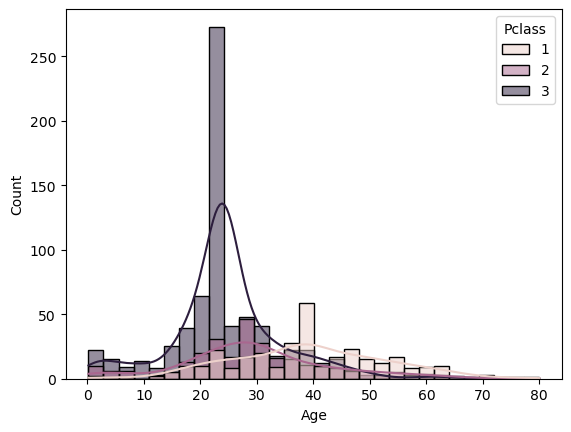

In [437]:
sns.histplot(data=dataset, x='Age', hue='Pclass', kde=True)
plt.show()

In [438]:
print(dataset.dtypes)

Survived    float64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


In [439]:
# # we need to encode the categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# we encode Sex, Embarked and Ticket
dataset['Sex'] = label_encoder.fit_transform(dataset['Sex'])
# # Encode Embarked column
# dataset['Embarked'] = label_encoder.fit_transform(dataset['Embarked'])

print(dataset.head())



   Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0       0.0       3    1  22.0      1      0  1.981001
1       1.0       1    0  38.0      1      0  4.266662
2       1.0       3    0  26.0      0      0  2.070022
3       1.0       1    0  35.0      1      0  3.972177
4       0.0       3    1  35.0      0      0  2.085672


In [440]:
# # correlation matrix
# corr = dataset.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()


In [441]:
print(dataset.head())

   Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0       0.0       3    1  22.0      1      0  1.981001
1       1.0       1    0  38.0      1      0  4.266662
2       1.0       3    0  26.0      0      0  2.070022
3       1.0       1    0  35.0      1      0  3.972177
4       0.0       3    1  35.0      0      0  2.085672


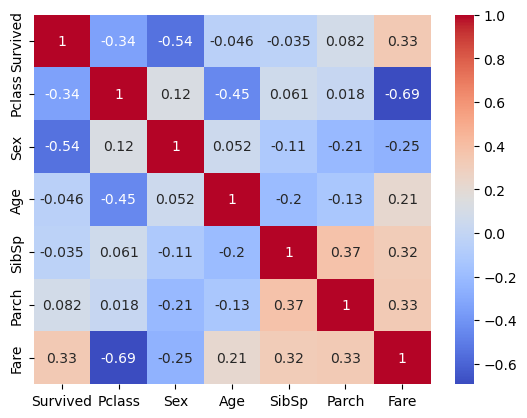

In [442]:
# correlation matrix
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [443]:
# feature engineering
# we can create a new feature called family size
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
dataset = dataset.drop(columns=['SibSp', 'Parch'], axis=1)

print(dataset.head())

   Survived  Pclass  Sex   Age      Fare  FamilySize
0       0.0       3    1  22.0  1.981001           2
1       1.0       1    0  38.0  4.266662           2
2       1.0       3    0  26.0  2.070022           1
3       1.0       1    0  35.0  3.972177           2
4       0.0       3    1  35.0  2.085672           1


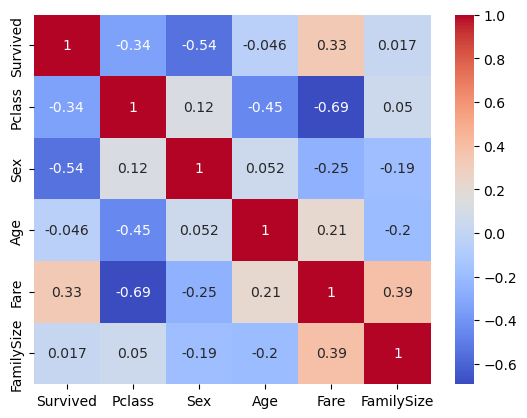

In [444]:
# correlation matrix
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Splitting the data + Scaling

In [445]:
train_dataset = dataset[dataset['Survived'].notna()]
print(train_dataset.shape[0])

891


In [446]:
# we split the dataset into X and y
X = train_dataset.drop(columns=['Survived'], axis=1)

Y = train_dataset['Survived']

# we split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [447]:
print(Y.isnull().sum())

0


## Logistic Regression

In [448]:
# Logistic Regression    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)
y_pred = lrmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)



0.8268156424581006


## XGBoost

In [449]:
# xgboost
from xgboost import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.001]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
y_pred = grid_search.predict(X_test)
xgbmodel = grid_search.best_estimator_
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400}
0.8398404412488919
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.8156424581005587


## Random Forest

In [450]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8100558659217877


## Hard Voting

In [451]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
estimators = [('lr', lrmodel),
              ('rf', rfmodel),
              ('xg', xgbmodel)]

hardmodel = VotingClassifier(estimators=estimators, voting='hard')
hardmodel.fit(X_train, y_train)
y_pred = hardmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8212290502793296


## Submission

In [452]:
finaltest_dataset = dataset[dataset['Survived'].isnull()]
finaltest_dataset = finaltest_dataset.drop(columns=['Survived'], axis=1)
print(finaltest_dataset)

      Pclass  Sex   Age      Fare  FamilySize
891        3    1  34.5  2.057860           1
892        3    0  47.0  1.945910           2
893        2    1  62.0  2.270836           1
894        3    1  27.0  2.159003           1
895        3    0  22.0  2.508582           3
...      ...  ...   ...       ...         ...
1304       3    1  24.0  2.085672           1
1305       1    0  39.0  4.690430           1
1306       3    1  38.5  1.981001           1
1307       3    1  24.0  2.085672           1
1308       3    1  24.0  3.107198           3

[418 rows x 5 columns]


In [453]:
# use model to predict the final test dataset
submission = xgbmodel.predict(finaltest_dataset)
submit = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': submission.astype(int)})
submit.to_csv('submission.csv', index=False)
